In [35]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [36]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [37]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Training Machine learning model

In [14]:
from sklearn.svm import SVC
model = SVC(C=1.0,kernel = 'rbf',gamma=0.01,probability=True)
model.fit(X_train,y_train)
print('model trained successfully')

model trained successfully


In [15]:
model.score(X_train,y_train)

0.8659652333028363

In [16]:
model.score(X_test,y_test)

0.7996340347666971

In [17]:
from sklearn import metrics

In [18]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [19]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[313, 127],
       [ 92, 561]], dtype=int64)

In [20]:
## accuracy
metrics.accuracy_score(y_test,y_pred)

0.7996340347666971

In [21]:
## classifier report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
cr = pd.DataFrame(cr).T
print(cr)

              precision    recall  f1-score      support
male           0.772840  0.711364  0.740828   440.000000
female         0.815407  0.859112  0.836689   653.000000
accuracy       0.799634  0.799634  0.799634     0.799634
macro avg      0.794123  0.785238  0.788759  1093.000000
weighted avg   0.798271  0.799634  0.798099  1093.000000


In [22]:
##kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5779736770189621

# ROC and AUC

Text(0.5, 1.0, 'Receiver operating characterstics')

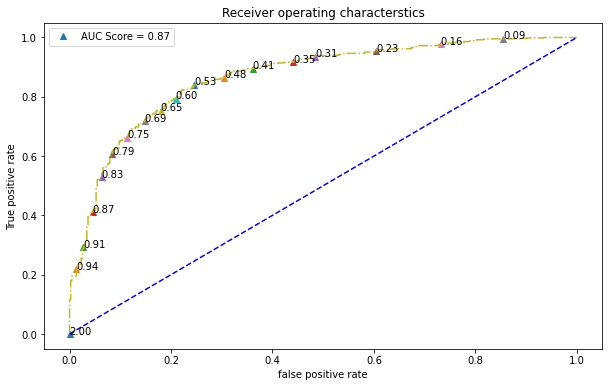

In [23]:
#roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
plt.legend(['AUC Score = %0.2f'%auc_s])
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characterstics')

# Hyper Parameter Tuning

In [63]:
model_tune = SVC()

In [60]:
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {'C':[1,10,20,30,40,50,100],'kernel':['poly', 'rbf'],'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],'coef0':[0,1],}

In [70]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [71]:
model_grid.fit(X,y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed: 25.7min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 40, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['poly', 'rbf']},
             scoring='accuracy', verbose=1)

In [72]:
model_grid.best_index_

105

In [73]:
model_grid.best_params_

{'C': 40, 'coef0': 0, 'gamma': 0.002, 'kernel': 'rbf'}

In [74]:
model_grid.best_score_

0.7849954254345837

In [24]:
model_best = SVC(C=40,kernel = 'rbf',gamma=0.002,coef0=0,probability=True)

In [25]:
model_best.fit(X_train,y_train)

SVC(C=40, coef0=0, gamma=0.002, probability=True)

In [26]:
y_pred = model_best.predict(X_test)
y_prob = model_best.predict_proba(X_test)

In [27]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[321, 119],
       [ 91, 562]], dtype=int64)

In [28]:
## accuracy
metrics.accuracy_score(y_test,y_pred)

0.807868252516011

In [29]:
## classifier report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
cr = pd.DataFrame(cr).T
print(cr)

              precision    recall  f1-score      support
male           0.779126  0.729545  0.753521   440.000000
female         0.825257  0.860643  0.842579   653.000000
accuracy       0.807868  0.807868  0.807868     0.807868
macro avg      0.802192  0.795094  0.798050  1093.000000
weighted avg   0.806686  0.807868  0.806728  1093.000000


In [30]:
##kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5963782540497576

Text(0.5, 1.0, 'Receiver operating characterstics')

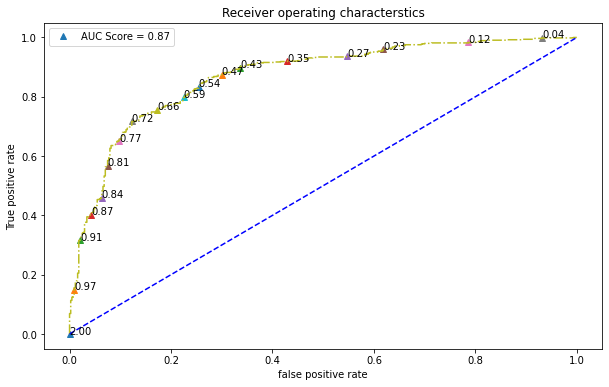

In [31]:
#roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
plt.legend(['AUC Score = %0.2f'%auc_s])
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characterstics')

In [32]:
import pickle

In [33]:
pickle.dump(model_best,open('mode_svc.pickle','wb'))

In [39]:
pickle.dump(mean,open('./data/mean_preprocess.pickle','wb'))